In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pooch
import os
import tempfile
import pandas as pd
import s3fs
import boto3
import botocore
import datetime

In [2]:
# helper functions

def pooch_load(filelocation=None,filename=None,processor=None):
    shared_location='/home/jovyan/shared/Data/Projects/Precipitation' # this is different for each day
    user_temp_cache=tempfile.gettempdir()
    
    if os.path.exists(os.path.join(shared_location,filename)):
        file = os.path.join(shared_location,filename)
    else:
        file = pooch.retrieve(filelocation,known_hash=None,fname=os.path.join(user_temp_cache,filename),processor=processor)

    return file

In [3]:
# code to retrieve and load the data

years=range(1981,2024) # the years you want. we want 1981 till 2023
file_paths=['https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p25/chirps-v2.0.'+str(year)+'.days_p25.nc' for year in years] # the format of the files
filenames=['chirps-v2.0.'+str(year)+'.days_p25.nc' for year in years] # the format of the files

downloaded_files=[ pooch_load(fpath,fname) for (fpath,fname) in zip(file_paths,filenames)] # download all of the files

#### open data as xarray
chirps_data = xr.open_mfdataset(
    downloaded_files, combine="by_coords"
)  # open the files as one dataset

In [4]:
# code to print the shape, array names, etc of the dataset
chirps_data

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 1440, time: 15491)
Coordinates:
  * latitude   (latitude) float32 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2023-05-31
Data variables:
    precip     (time, latitude, longitude) float32 dask.array<chunksize=(365, 400, 1440), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-10-07
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [5]:
import xarray as xr

# Slice the data for the years 2000 to 2020
time_sliced = chirps_data.sel(time=slice('2000-01-01', '2020-12-31'))



In [6]:
time_sliced

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 1440, time: 7671)
Coordinates:
  * latitude   (latitude) float32 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precip     (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 1440), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-10-07
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [7]:
import xarray as xr

# Define latitude and longitude ranges for India
lat_range = slice(8, 38)
lon_range = slice(68, 98)

# Subset the data for India
india = time_sliced.sel(latitude=lat_range, longitude=lon_range)



In [8]:
india

<xarray.Dataset>
Dimensions:    (latitude: 120, longitude: 120, time: 7671)
Coordinates:
  * latitude   (latitude) float32 8.125 8.375 8.625 8.875 ... 37.38 37.62 37.88
  * longitude  (longitude) float32 68.12 68.38 68.62 68.88 ... 97.38 97.62 97.88
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precip     (time, latitude, longitude) float32 dask.array<chunksize=(366, 120, 120), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-10-07
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [9]:
india.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (latitude: 120, longitude: 120, time: 7671)
Coordinates:
  * latitude   (latitude) float32 8.125 8.375 8.625 8.875 ... 37.38 37.62 37.88
  * longitude  (longitude) float32 68.12 68.38 68.62 68.88 ... 97.38 97.62 97.88
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precip     (time, latitude, longitude) float32 dask.array<chunksize=(366, 120, 120), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-10-07
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
 

In [10]:
# Making a list of 2562 timestamps for selection
filenames = []
for y in ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
  for d in ['01','02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']:
    for m in ['06', '07', '08', '09']:
        filenames.append(f'{y}-{m}-{d}')
for y in ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
  for m in ['07', '08']:
    d='31'
    filenames.append(f'{y}-{m}-{d}')

filenames= sorted(filenames)
print(filenames)

['2000-06-01', '2000-06-02', '2000-06-03', '2000-06-04', '2000-06-05', '2000-06-06', '2000-06-07', '2000-06-08', '2000-06-09', '2000-06-10', '2000-06-11', '2000-06-12', '2000-06-13', '2000-06-14', '2000-06-15', '2000-06-16', '2000-06-17', '2000-06-18', '2000-06-19', '2000-06-20', '2000-06-21', '2000-06-22', '2000-06-23', '2000-06-24', '2000-06-25', '2000-06-26', '2000-06-27', '2000-06-28', '2000-06-29', '2000-06-30', '2000-07-01', '2000-07-02', '2000-07-03', '2000-07-04', '2000-07-05', '2000-07-06', '2000-07-07', '2000-07-08', '2000-07-09', '2000-07-10', '2000-07-11', '2000-07-12', '2000-07-13', '2000-07-14', '2000-07-15', '2000-07-16', '2000-07-17', '2000-07-18', '2000-07-19', '2000-07-20', '2000-07-21', '2000-07-22', '2000-07-23', '2000-07-24', '2000-07-25', '2000-07-26', '2000-07-27', '2000-07-28', '2000-07-29', '2000-07-30', '2000-07-31', '2000-08-01', '2000-08-02', '2000-08-03', '2000-08-04', '2000-08-05', '2000-08-06', '2000-08-07', '2000-08-08', '2000-08-09', '2000-08-10', '2000

In [12]:
# Making a list of mean rainfall for the entire time range
rainfall=[]
for i in filenames:
  r= india['precip'].sel(time=i).values
  r[np.isnan(r)]=0
  rainfall.append(np.mean(r))

rainfall_arr= np.array(rainfall).reshape(21,122)
arr= np.zeros((21, 122))
sum= np.zeros((122))
arr= rainfall_arr

In [13]:
print(arr.shape)

(21, 122)


In [14]:
# Computing mean rainfall for each season, and standard deviation in rainfall for a particular day of the season

# Iitialising arrays of quantities
sum= np.zeros((122))
mean= np.zeros((122))
midsig= np.zeros((122))
sigma= np.zeros((122))

# Computing mean rainfall for each season
for i in range(0, 122):
    for y in range(0,21):
        sum[i]= sum[i]+ arr[y, i]
mean= np.zeros((122))
mean=sum/20

In [15]:
# Computing standard deviation in rainfall for a particular day of the season
for i in range(0, 122):
    for y in range(0,2):
        midsig[i] = midsig[i] + ((arr[y, i] - mean[i])**2)
sigma= np.sqrt(midsig/21)

In [16]:
active_spells=[]
break_spells=[]

year =np.zeros((122))
for y in range(1,21):
    for i in range(0, 122):
        #f= xr.open_dataset(file_list[i + (y*122)])['precipitationCal']
        #year[i]= (np.mean(f.values))
        year[i]= np.mean(arr[y])


    # computing normalised precipitation anomaly
    anomaly= np.zeros((122))
    anomaly= (year-mean)/sigma

     # identifying points of anomaly
    anom_active= np.argwhere(anomaly>1)
    anom_break= np.argwhere(anomaly<-1)

    # identifying three consecutive points of anomaly, and counting it as active/break spell
    anom_active_padded= np.insert(anom_active, anom_active.shape[0], 10000)
    anom_break_padded= np.insert(anom_break, anom_break.shape[0], 10000)

    counta_list=[]
    counta=1
    for i in range(anom_active_padded.shape[0]-1):
        if anom_active_padded[i+1] == anom_active_padded[i]+1:
            counta= counta+1
        else:
            counta_list.append(counta)
            counta=1
    spella=0
    for i in counta_list:
        if i>3:
            spella = spella+1

    countb_list=[]
    countb=1
    for i in range(anom_break_padded.shape[0]-1):
        if anom_break_padded[i+1] == anom_break_padded[i]+1:
            countb= countb+1
        else:
            countb_list.append(countb)
            countb=1
    spellb=0
    for i in countb_list:
        if i>3:
            spellb=spellb+1

    active_spells.append(spella)
    break_spells.append(spellb)

In [17]:
print(active_spells)

[1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1]


In [18]:
print(break_spells)

[5, 4, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0]


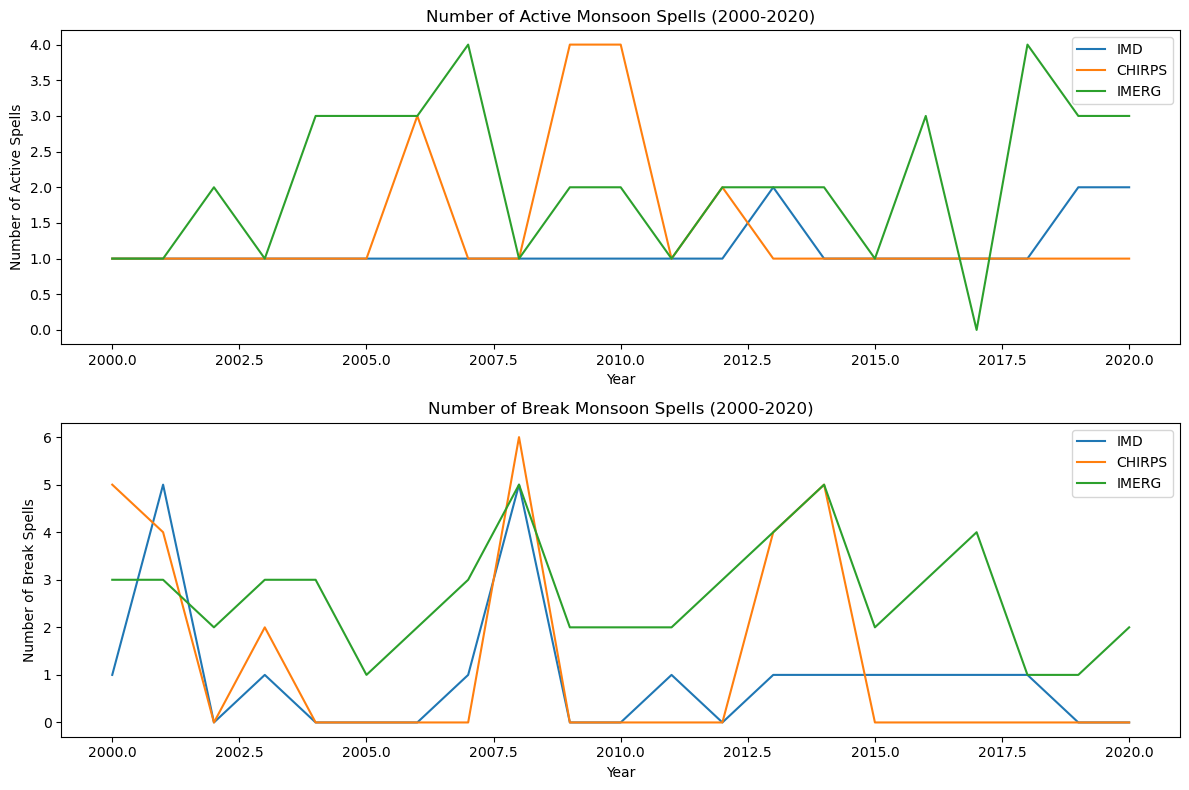

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'IMD_Active': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2],
    'CHIRPS_Active': [1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1],
    'IMERG_Active': [1, 1, 2, 1, 3, 3, 3, 4, 1, 2, 2, 1, 2, 2, 2, 1, 3, 0, 4, 3, 3],
    'IMD_Break': [1, 5, 0, 1, 0, 0, 0, 1, 5, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    'CHIRPS_Break': [5, 4, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0],
    'IMERG_Break': [3, 3, 2, 3, 3, 1, 2, 3, 5, 2, 2, 2, 3, 4, 5, 2, 3, 4, 1, 1, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting active spells
plt.subplot(2, 1, 1)
plt.plot(df['Year'], df['IMD_Active'], label='IMD')
plt.plot(df['Year'], df['CHIRPS_Active'], label='CHIRPS')
plt.plot(df['Year'], df['IMERG_Active'], label='IMERG')
plt.title('Number of Active Monsoon Spells (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Active Spells')
plt.legend()

# Plotting break spells
plt.subplot(2, 1, 2)
plt.plot(df['Year'], df['IMD_Break'], label='IMD')
plt.plot(df['Year'], df['CHIRPS_Break'], label='CHIRPS')
plt.plot(df['Year'], df['IMERG_Break'], label='IMERG')
plt.title('Number of Break Monsoon Spells (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Break Spells')
plt.legend()

plt.tight_layout()
plt.show()


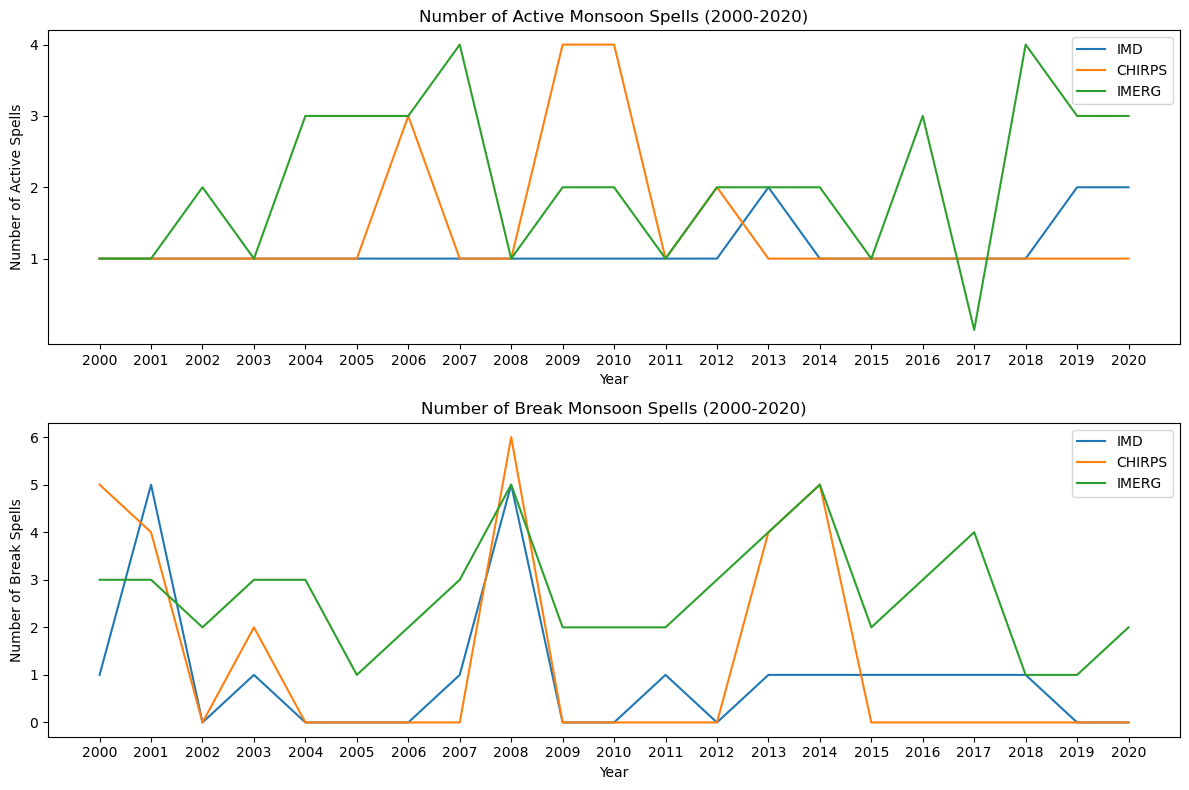

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'IMD_Active': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2],
    'CHIRPS_Active': [1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1],
    'IMERG_Active': [1, 1, 2, 1, 3, 3, 3, 4, 1, 2, 2, 1, 2, 2, 2, 1, 3, 0, 4, 3, 3],
    'IMD_Break': [1, 5, 0, 1, 0, 0, 0, 1, 5, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    'CHIRPS_Break': [5, 4, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0],
    'IMERG_Break': [3, 3, 2, 3, 3, 1, 2, 3, 5, 2, 2, 2, 3, 4, 5, 2, 3, 4, 1, 1, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting active spells
plt.subplot(2, 1, 1)
plt.plot(df['Year'], df['IMD_Active'], label='IMD')
plt.plot(df['Year'], df['CHIRPS_Active'], label='CHIRPS')
plt.plot(df['Year'], df['IMERG_Active'], label='IMERG')
plt.title('Number of Active Monsoon Spells (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Active Spells')
plt.xticks(df['Year'])  # Set x-axis ticks to integer values
plt.yticks(range(int(df['IMD_Active'].min()), int(df['IMD_Active'].max()) + 3))  # Set y-axis ticks to integer values
plt.legend()

# Plotting break spells
plt.subplot(2, 1, 2)
plt.plot(df['Year'], df['IMD_Break'], label='IMD')
plt.plot(df['Year'], df['CHIRPS_Break'], label='CHIRPS')
plt.plot(df['Year'], df['IMERG_Break'], label='IMERG')
plt.title('Number of Break Monsoon Spells (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Break Spells')
plt.xticks(df['Year'])  # Set x-axis ticks to integer values
plt.yticks(range(int(df['IMD_Break'].min()), int(df['IMD_Break'].max()) + 2))  # Set y-axis ticks to integer values
plt.legend()


plt.tight_layout()
plt.savefig('monsoon_spells.png')
plt.show()


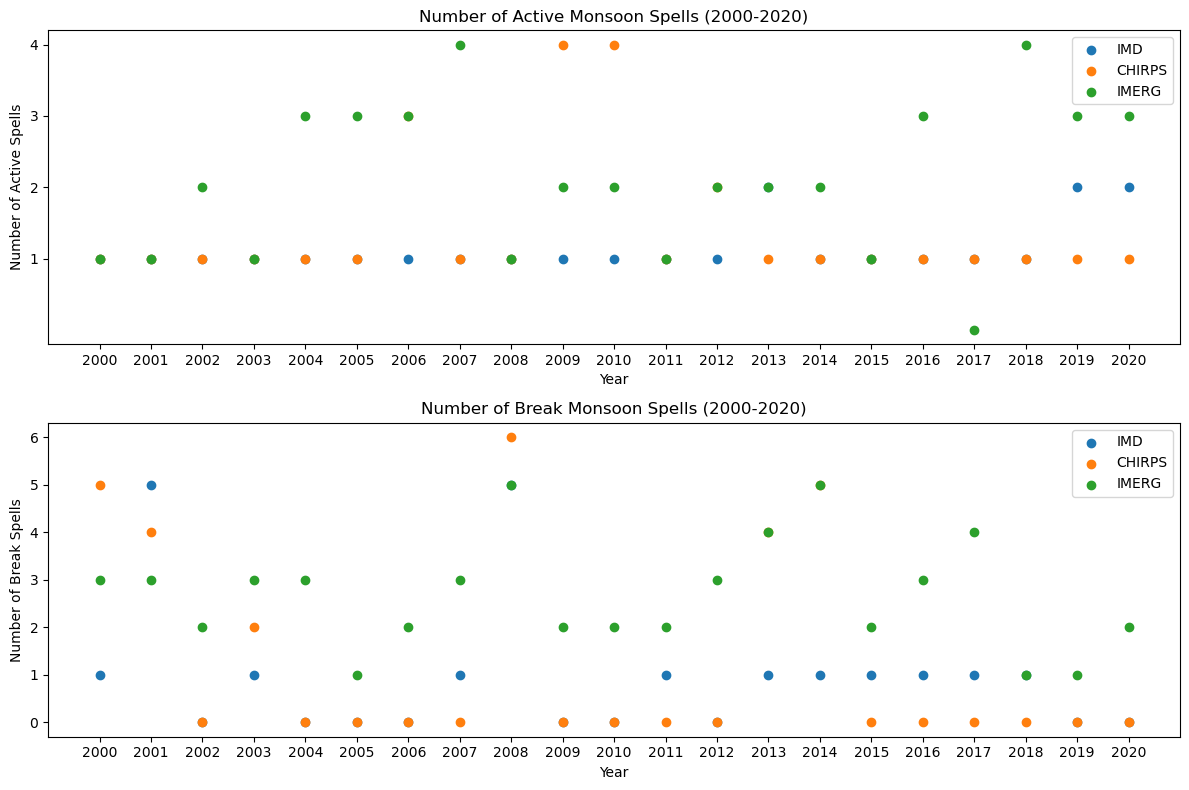

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'IMD_Active': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2],
    'CHIRPS_Active': [1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1],
    'IMERG_Active': [1, 1, 2, 1, 3, 3, 3, 4, 1, 2, 2, 1, 2, 2, 2, 1, 3, 0, 4, 3, 3],
    'IMD_Break': [1, 5, 0, 1, 0, 0, 0, 1, 5, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    'CHIRPS_Break': [5, 4, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0],
    'IMERG_Break': [3, 3, 2, 3, 3, 1, 2, 3, 5, 2, 2, 2, 3, 4, 5, 2, 3, 4, 1, 1, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting active spells
plt.subplot(2, 1, 1)
plt.scatter(df['Year'], df['IMD_Active'], label='IMD')
plt.scatter(df['Year'], df['CHIRPS_Active'], label='CHIRPS')
plt.scatter(df['Year'], df['IMERG_Active'], label='IMERG')
plt.title('Number of Active Monsoon Spells (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Active Spells')
plt.xticks(df['Year'])  # Set x-axis ticks to integer values
plt.yticks(range(int(df['IMD_Active'].min()), int(df['IMD_Active'].max()) + 3))  # Set y-axis ticks to integer values
plt.legend()

# Plotting break spells
plt.subplot(2, 1, 2)
plt.scatter(df['Year'], df['IMD_Break'], label='IMD')
plt.scatter(df['Year'], df['CHIRPS_Break'], label='CHIRPS')
plt.scatter(df['Year'], df['IMERG_Break'], label='IMERG')
plt.title('Number of Break Monsoon Spells (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Break Spells')
plt.xticks(df['Year'])  # Set x-axis ticks to integer values
plt.yticks(range(int(df['IMD_Break'].min()), int(df['IMD_Break'].max()) + 2))  # Set y-axis ticks to integer values
plt.legend()


plt.tight_layout()
plt.savefig('monsoon_spells.png')
plt.show()


In [6]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_directory)


Current Working Directory: /home/jovyan/course-content/projects/project-notebooks
